### Computational Challenge 2

In this computational challenge you will implement a Markov chain models of a bio-logical system:

Model 1: Quasi-stationary distributions in the birth-death model.

In a general birth and death process, the probability that the population increases or decreases between steps can depend on the population size. 

Denote the size of a population at time,t by Xt. 

The transition probabilities are then given by:

P(Xt+1=j+ 1|Xt=j) = bj
P(Xt+1=j−1|Xt=j) = dj
P(Xt+1=j|Xt=j) = 1−(bj+dj)

   where additionally d0= 0 and b0= 0, so that a population with no      individuals is an absorbing state. Moreover, supi(bi+di)≤1.
   
Note that all states, except for 0, are transient. 

To keep the population finite we also assume that bN= 0 for some N >1. If you don’t remember the logistic growth model covered in most calculus classes, refresh yourmemory by reading the relevant Wikipedia page, or consulting any other resource. 

For a logisticgrowth process we can assume bi−di=ri(1−i/K). Note that any choices of bi and di thatsatisfy this equation are consistent with logistic growth because the expected increment over a time interval is ri(1−i/K).Assume that bi=r(i−i2/2K) and di=ri2/2K, so that the maximal population size is N= 2K(otherwise transition probabilities become negative), and the carrying capacity of the environment is K.

Implement computationally the Markov chain defined by these transition probabilities. 

• Choose r= 0.004,K = 50. Plot several trajectories to get a feel for the behavior of the population.

After several thousand timesteps the population size should fluctuate around 50. Run the simulation up to t= 3000 (or a time of your choices where the mean stabilizes) a number of times to create a histogram of the population size at that time.

• Set r= 0.015 and K= 8. Run the simulation until the population goes extinct starting at different initial population sizes. Plot the mean time to extinction.

• Discuss how the answers to the previous two questions can be consistent: The first suggests that the population reaches a stable distribution around the carrying capacity. The second suggests that the population goes extinct.

In [25]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
import time


# function for transition probability

seed = 98765

np.random.seed(seed)

# Function: Calculate birth and death probabilities
def updateProp(r, K, X_t):
    """ This function returns the birth/death probabilities
    
    Attributes:
        r - growth rate
        K - carrrying capacity
        X_t - current population
    """
    b = r*(X_t - ((np.power(X_t, 2))/(2*K)))
    d = r*np.power(X_t, 2)/(2*K)
    return b, d


# Function: Generate population trajectories
def birthdeath(X0, N, trajectories, r, K):

    s = np.zeros((trajectories, N))
    X = np.zeros((trajectories, N))
    h = np.zeros(trajectories)
    X[:,0] = X0
    s[:,0] = 0.001
    #s[:,0] = 0
    
    
    for j in range(trajectories):
        i = 0
        while X[j,i] > 0 and i < (N-1):
            
            b, d = updateProp(r, K, X[:,i])
            Y1 = np.random.rand(trajectories)
            Y2 = np.random.rand(trajectories) 
            h = -np.log(Y1)/((b+d)*X[j,i])
            s[j,i+1] = s[j,i] + h[j]
            
            # change pop
            
            if Y2[j] < b[j]:
                X[j,i+1] = X[j,i] + 1    # birth occurs  
                
            elif Y2[j] > (b[j]+d[j]):
                X[j,i+1] = X[j,i]        # no change
                
            else:
                X[j,i+1] = X[j,i] - 1    # death occurs
                
            i += 1
                
    return [s,X]

# solve and plot trajectories
def solve_and_plot(X0, N, trajectories, r, K):
    fig, ax = plt.subplots()
    
    [sojourn, population] = birthdeath(X0, N, trajectories, r, K)
    
    end = time.time()
    
    ## Sets axis ranges for plotting
    xmax = max([max(sojourn[k,:]) for k in range(trajectories)])
    ymax = max([max(population[k,:]) for k in range(trajectories)])
    
    #sojourn[sojourn==0] = np.nan
    
    ## Generate plots
    for r in range(trajectories):
        plt.step(sojourn[r,:], population[r,:], where = 'pre', label="X0 =  %s" % str(X0[r]))
        plt.axis([-0.1, xmax+0.2, 0, ymax+2])
        ax.set_xlabel('Time', fontsize=14)
        ax.set_ylabel('Population Size', fontsize=14)
        plt.title('Does population size fluctuate around carrying capacity $K = {P}$?'.format(P=K))
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.tight_layout()
        plt.legend(bbox_to_anchor= (1.05,1), loc=2, borderaxespad=0.0)
        plt.show
        
    return sojourn, population

#### Question 1.1. 

Choose r=0.004, K=50. Plot several trajectories to get a feel fot the behavior of the population.

/home/dcajuzie/.virtualenvs/dl4cv/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


Computational time is 0.8879425525665283 seconds.


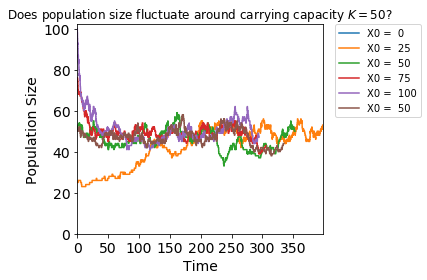

In [26]:
# Generate and plot some population trajectories

# -- initial parameters

start = time.time()
        
maxPop = 3000
growth_rate = 0.004    # growth_rate
carrying_capacity = 50    # carrying_capacity
X0 = [0, 25, 50, 75, 100, 50]
trajectories = len(X0)

solve_and_plot(X0, maxPop, trajectories, growth_rate, carrying_capacity)

end = time.time()

print('Computational time is {t} seconds.'.format(t=end-start))



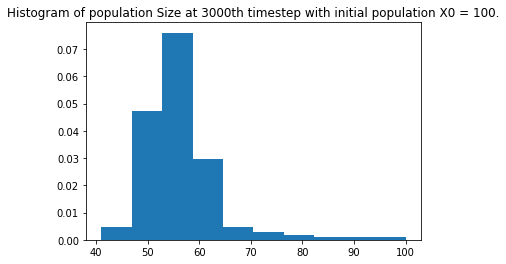

Computational time is 0.25699901580810547 seconds.


In [33]:
#### Question 1.2. 

# Create a histogram of the population size at t=3000

start = time.time()
        
plt.hist(population[0,:], density=True)
plt.title('Histogram of population Size at {T}th timestep with initial population X0 = 100.'.format(T=maxPop))
plt.show()

end = time.time()

print('Computational time is {t} seconds.'.format(t=end-start))      
